## Unit Root, Trend and Difference Stationary Models

### Unit Root
* $X_T$ is integrated of order 0 (stationary) if:
  * $E(X_t) = \mu$
  * $Var(X_t) = \sigma^2$
  * ACF decreases steadily as k increases over time
* $Y_t$ is integrated of order 1 (nonstationary) with first difference $\triangle Y_t = Y_t - Y_{t-1}$ is stationary if :
  * $E(Y_t) = \mu_t$
  * $Var(Y_t) = \sigma^2_t$
  * ACF tends to 1 for all k as t goes to infinity

### Augmented Dickey-Fuller (ADF) Test
* Popular unit root test
* $H_0 : \phi = 1 ; H_1 : \phi < 1$
* $ADF = t_{\phi} = \frac{\hat{\phi}-1}{\hat{\sigma_{\hat{\phi}}}}$
* Example:
  * For Unempl. rate data, ADF test statistic was found to be -2.731816 and the Prob. 0.0695
  * So, at 5% level, you reject $H_0$ (so time series is stationary $\because$ 0.06 > 0.05) while at 10% level you fail to reject $H_0$ (so time series is non stationary with order 1 so you have to difference the series $\because$ 0.06 < 0.10)
  * For urate of order 2, with ADF = -6.599 and p = 0.000, you strongly reject the $H_0 \because$ 0 << 0.01, 0.05, 0.10

### Trend versus Difference Stationarity
* Difference stationarity : $\triangledown X_t = a_t \Rightarrow X_t = X_{t-1} + a_t$
  * This is a random walk without drift, where $a_t$ is a white noise
  * $\epsilon_t = \theta_q (B)a_t$
  * The mean changes through time stochastically
* Trend staionarity is : $X_t = \beta_0 + \beta_1 t + a_t$
  * Mean is time dependent but the variance is constant

#### Testing for more than one unit root
In general, we perform the unit root test on the assumption that 𝑋𝑡 is either 𝐼(0) or 𝐼 1 , that is, the series is either stationary in levels or contains at most one unit root and needs first differences to became stationary, (1 − 𝐵)𝑋𝑡 .

If the null hypothesis of a unit root is not rejected, we need to test whether the series contains a second unit root or 𝑋𝑡 is 𝐼 2 and, thus, needs second differences to became stationary, (1 − 𝐵)2𝑋𝑡.
 

In [ ]:
import seaborn as sns

    value
0      88
1      84
2      85
3      85
4      84
..    ...
95    222
96    228
97    226
98    222
99    220

[100 rows x 1 columns]
ADF Statistic: -2.464240
p-value: 0.124419
ADF2 Statistic: -2.722238
p-value: 0.070268


/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


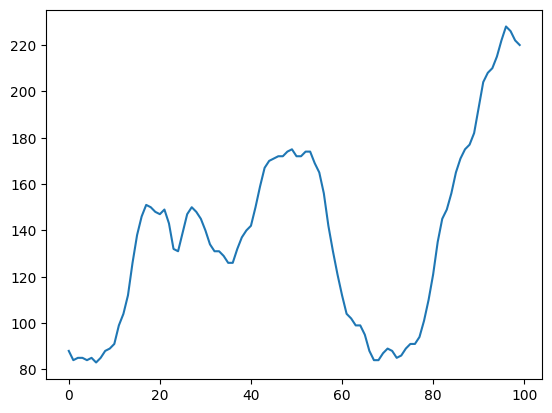

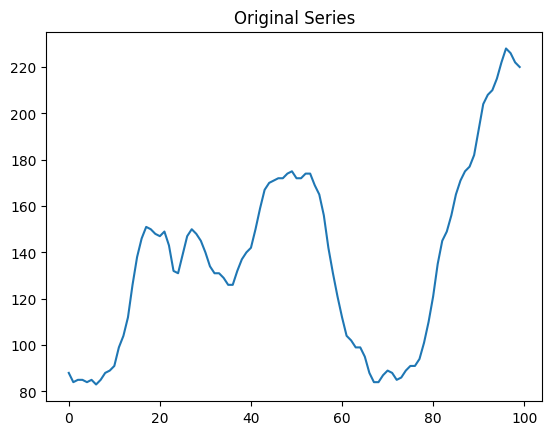

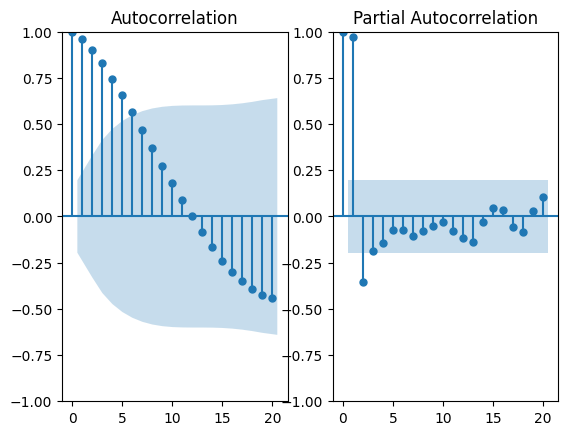

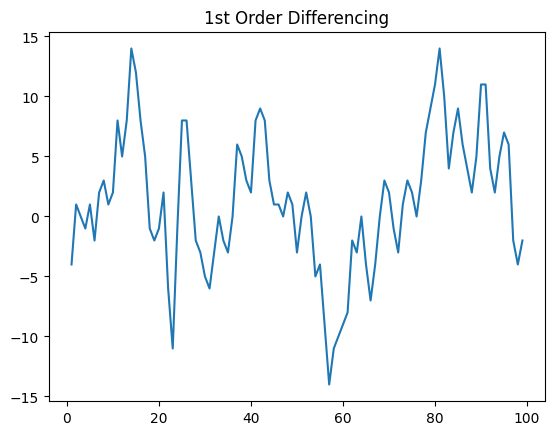

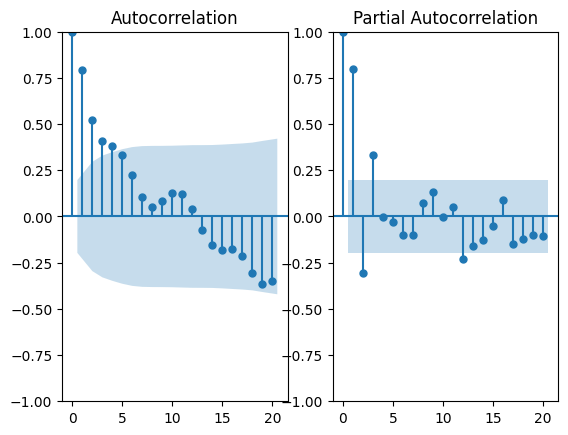

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 21 15:01:14 2020

@author: Jorge Caiado
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
        'https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', 
        names=['value'], header=0)
print(df)
plt.plot(df)

# Unit Root Test
from statsmodels.tsa.stattools import adfuller
from numpy import log
adf = adfuller(df.value.dropna())
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
adf2 = adfuller(df.value.diff().dropna())
print('ADF2 Statistic: %f' % adf2[0])
print('p-value: %f' % adf2[1])

#Since P-value>0.05, take first differences and take a look to ACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

    # Original Series
fig, axes = plt.subplots()
axes.plot(df.value)
axes.set_title('Original Series')
fig, axes = plt.subplots(1, 2, sharex=True)
plot_acf(df.value, lags=20, ax=axes[0])
plot_pacf(df.value, lags=20, ax=axes[1])

    # 1st Differencing
fig, axes = plt.subplots()  
axes.plot(df.value.diff())
axes.set_title('1st Order Differencing')
fig, axes = plt.subplots(1, 2, sharex=True)
plot_acf(df.value.diff().dropna(), lags=20, ax=axes[0])
plot_pacf(df.value.diff().dropna(), lags=20, ax=axes[1])

plt.show()

